## Task 2: Classification with Logistic Regression

- Description: Build a decision tree classifier to predict
a categorical outcome (e.g., predict species of
flowers).


In [48]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
# load the data and preprocess it.
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
data["species"].nunique()

3

In [51]:
# there are no missing values.
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [52]:
# we have to categorize only target column.
encoder = sklearn.preprocessing.LabelEncoder()
data["species"] = encoder.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
data["species"].unique()

array([0, 1, 2])

In [54]:
x = data.drop(['species'], axis = 1)
y = data['species']

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 42)

In [56]:
print(f"The shape of x_train {x_train.shape}")
print(f"The shape of t_train {y_train.shape}")
print(f"The shape of x_test {x_test.shape}")
print(f"The shape of y_test {y_test.shape}")

The shape of x_train (120, 4)
The shape of t_train (120,)
The shape of x_test (30, 4)
The shape of y_test (30,)


Our dataset is totally preprocessed and ready to give it to model.

- Train and evaluate the logistic regression model.


In [57]:
lr = sklearn.linear_model.LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [67]:
y_pred_lr = lr.predict(x_test)

- Use metrics such as accuracy, precision, recall, and the
ROC curve for evaluation.


In [ ]:
# Accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_lr)
print(f"The accuracy score of the model_lr is {accuracy*100} %.")

The accuracy score of the model is 100.0 %.


In [60]:
# Precision.
precision = sklearn.metrics.precision_score(y_test, y_pred, average='macro')
print(f"The precision score of the model is {precision*100} %.")

The precision score of the model is 100.0 %.


In [61]:
# Recall.
recall = sklearn.metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"The recall score of the model is {recall*100} %.")

The recall score of the model is 100.0 %.


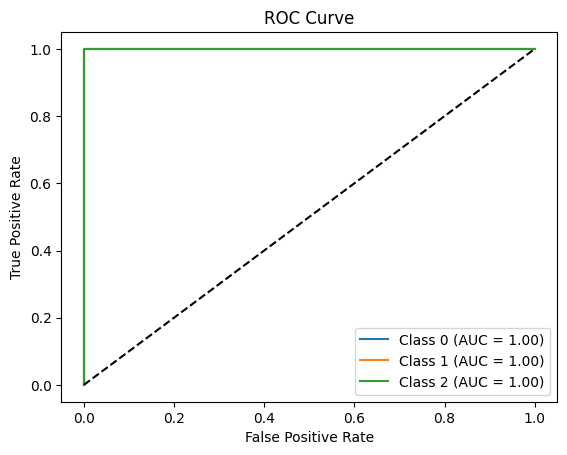

In [62]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = lr.predict_proba(x_test)  # Probabilities instead of labels

# Compute ROC curve and AUC for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

- Compare logistic regression with other classifiers like
Random Forest or SVM.

In [63]:
svm = sklearn.svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [64]:
y_pred =svm.predict(x_test)

In [66]:
accuracy_svm = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"The accuracy score of the svm_model is {accuracy_svm*100} %.")

The accuracy score of the svm_model is 100.0 %.


Comperison.

In [69]:
# Accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_lr)
print(f"The accuracy score of the model_lr is {accuracy*100} %.")
print('\n')
accuracy_svm = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"The accuracy score of the svm_model is {accuracy_svm*100} %.")

The accuracy score of the model_lr is 100.0 %.


The accuracy score of the svm_model is 100.0 %.


The accuracy of both the models is same and 100 percent because of our data is very small.

- Tools: Python, scikit-learn, pandas, matplotlib.
